In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import *

In [4]:
from sklearn.model_selection import train_test_split

In [53]:
df = pd.read_csv("Phillip-Morris.csv")

In [60]:
df.drop(["Column-9","Column-10","Column-11","Column-12","Column-13","Column-14",],axis=1,inplace=True)

In [61]:
df.tail()

,Datum,Kurz BCPP[Kč],Změna BCPP[%],Objem BCPP[Kč],Počet BCPP[ks],Kurz RMS[Kč],Změna RMS[%],Objem RMS[Kč],Počet RMS[ks]
196,19.3.2007,10 556.00,+0.24%,5 135 214,484,10 619.60,0.00%,424 386,40
197,16.3.2007,10 531.00,+0.17%,36 601 344,3 479,10 620.00,0.00%,476 450,45
198,15.3.2007,10 513.00,+0.63%,37 949 054,3 605,10 619.90,-0.28%,827 292,78
199,14.3.2007,10 447.00,-1.45%,98 921 384,9 452,10 650.00,-1.93%,2 345 023,223
200,13.3.2007,10 601.00,-2.25%,64 652 397,5 989,10 860.00,-0.92%,456 700,42


In [62]:
df["Kurz BCPP[Kč]"] = df["Kurz BCPP[Kč]"].str.replace("\s+","").apply(lambda x: Decimal(x))

In [63]:
df["Kurz BCPP[Kč]"][1]*df["Kurz BCPP[Kč]"][2]

Decimal('62393045.0000')

In [67]:
df["Datum"] = pd.to_datetime(df["Datum"],format="%d.%m.%Y")

In [68]:
df.head()

,Datum,Kurz BCPP[Kč],Změna BCPP[%],Objem BCPP[Kč],Počet BCPP[ks],Kurz RMS[Kč],Změna RMS[%],Objem RMS[Kč],Počet RMS[ks]
1,2007-12-28,7933.00,+0.86%,59 288 431,7 523,7 941.70,+0.68%,435 084,55
2,2007-12-27,7865.00,+1.61%,48 378 384,6 232,7 888.00,+1.38%,281 328,36
3,2007-12-21,7740.00,+1.83%,43 881 460,5 689,7 780.00,+1.05%,77 800,10
4,2007-12-20,7601.00,-1.16%,35 156 067,4 572,7 699.00,+0.44%,232 456,30
5,2007-12-19,7690.00,-0.26%,41 019 939,5 315,7 665.10,-0.45%,431 851,56


In [69]:
df = df.sort_values("Datum")

In [96]:
df.head()

,Datum,Kurz BCPP[Kč],Změna BCPP[%],Objem BCPP[Kč],Počet BCPP[ks],Kurz RMS[Kč],Změna RMS[%],Objem RMS[Kč],Počet RMS[ks]
200,2007-03-13,10601.00,-2.25%,64652397,5989,10 860.00,-0.92%,456 700,42
199,2007-03-14,10447.00,-1.45%,98921384,9452,10 650.00,-1.93%,2 345 023,223
198,2007-03-15,10513.00,+0.63%,37949054,3605,10 619.90,-0.28%,827 292,78
197,2007-03-16,10531.00,+0.17%,36601344,3479,10 620.00,0.00%,476 450,45
196,2007-03-19,10556.00,+0.24%,5135214,484,10 619.60,0.00%,424 386,40


In [88]:
df["Objem BCPP[Kč]"] = df["Objem BCPP[Kč]"].str.replace("\s+","").apply(lambda x: Decimal(x))

In [94]:
df["Počet BCPP[ks]"] = df["Počet BCPP[ks]"].str.replace("\s+","").apply(lambda x: Decimal(x))

In [116]:
df_small = df[df["Datum"].between("2007-05-22", "2007-06-22")]

In [117]:
df_small.head()

,Datum,Kurz BCPP[Kč],Změna BCPP[%],Objem BCPP[Kč],Počet BCPP[ks],Kurz RMS[Kč],Změna RMS[%],Objem RMS[Kč],Počet RMS[ks]
153,2007-05-22,11001.00,+0.23%,11348157,1030,11 000.00,+1.43%,1 408 634,128
152,2007-05-23,10875.00,-1.15%,51942971,4777,10 904.40,-0.86%,1 067 101,98
151,2007-05-24,10855.00,-0.18%,14691202,1354,10 710.90,-1.77%,343 460,32
150,2007-05-25,10810.00,-0.41%,5172252,479,10 734.10,+0.21%,0,0
149,2007-05-28,10795.00,-0.14%,1671372,156,10 901.30,+1.55%,924 929,85


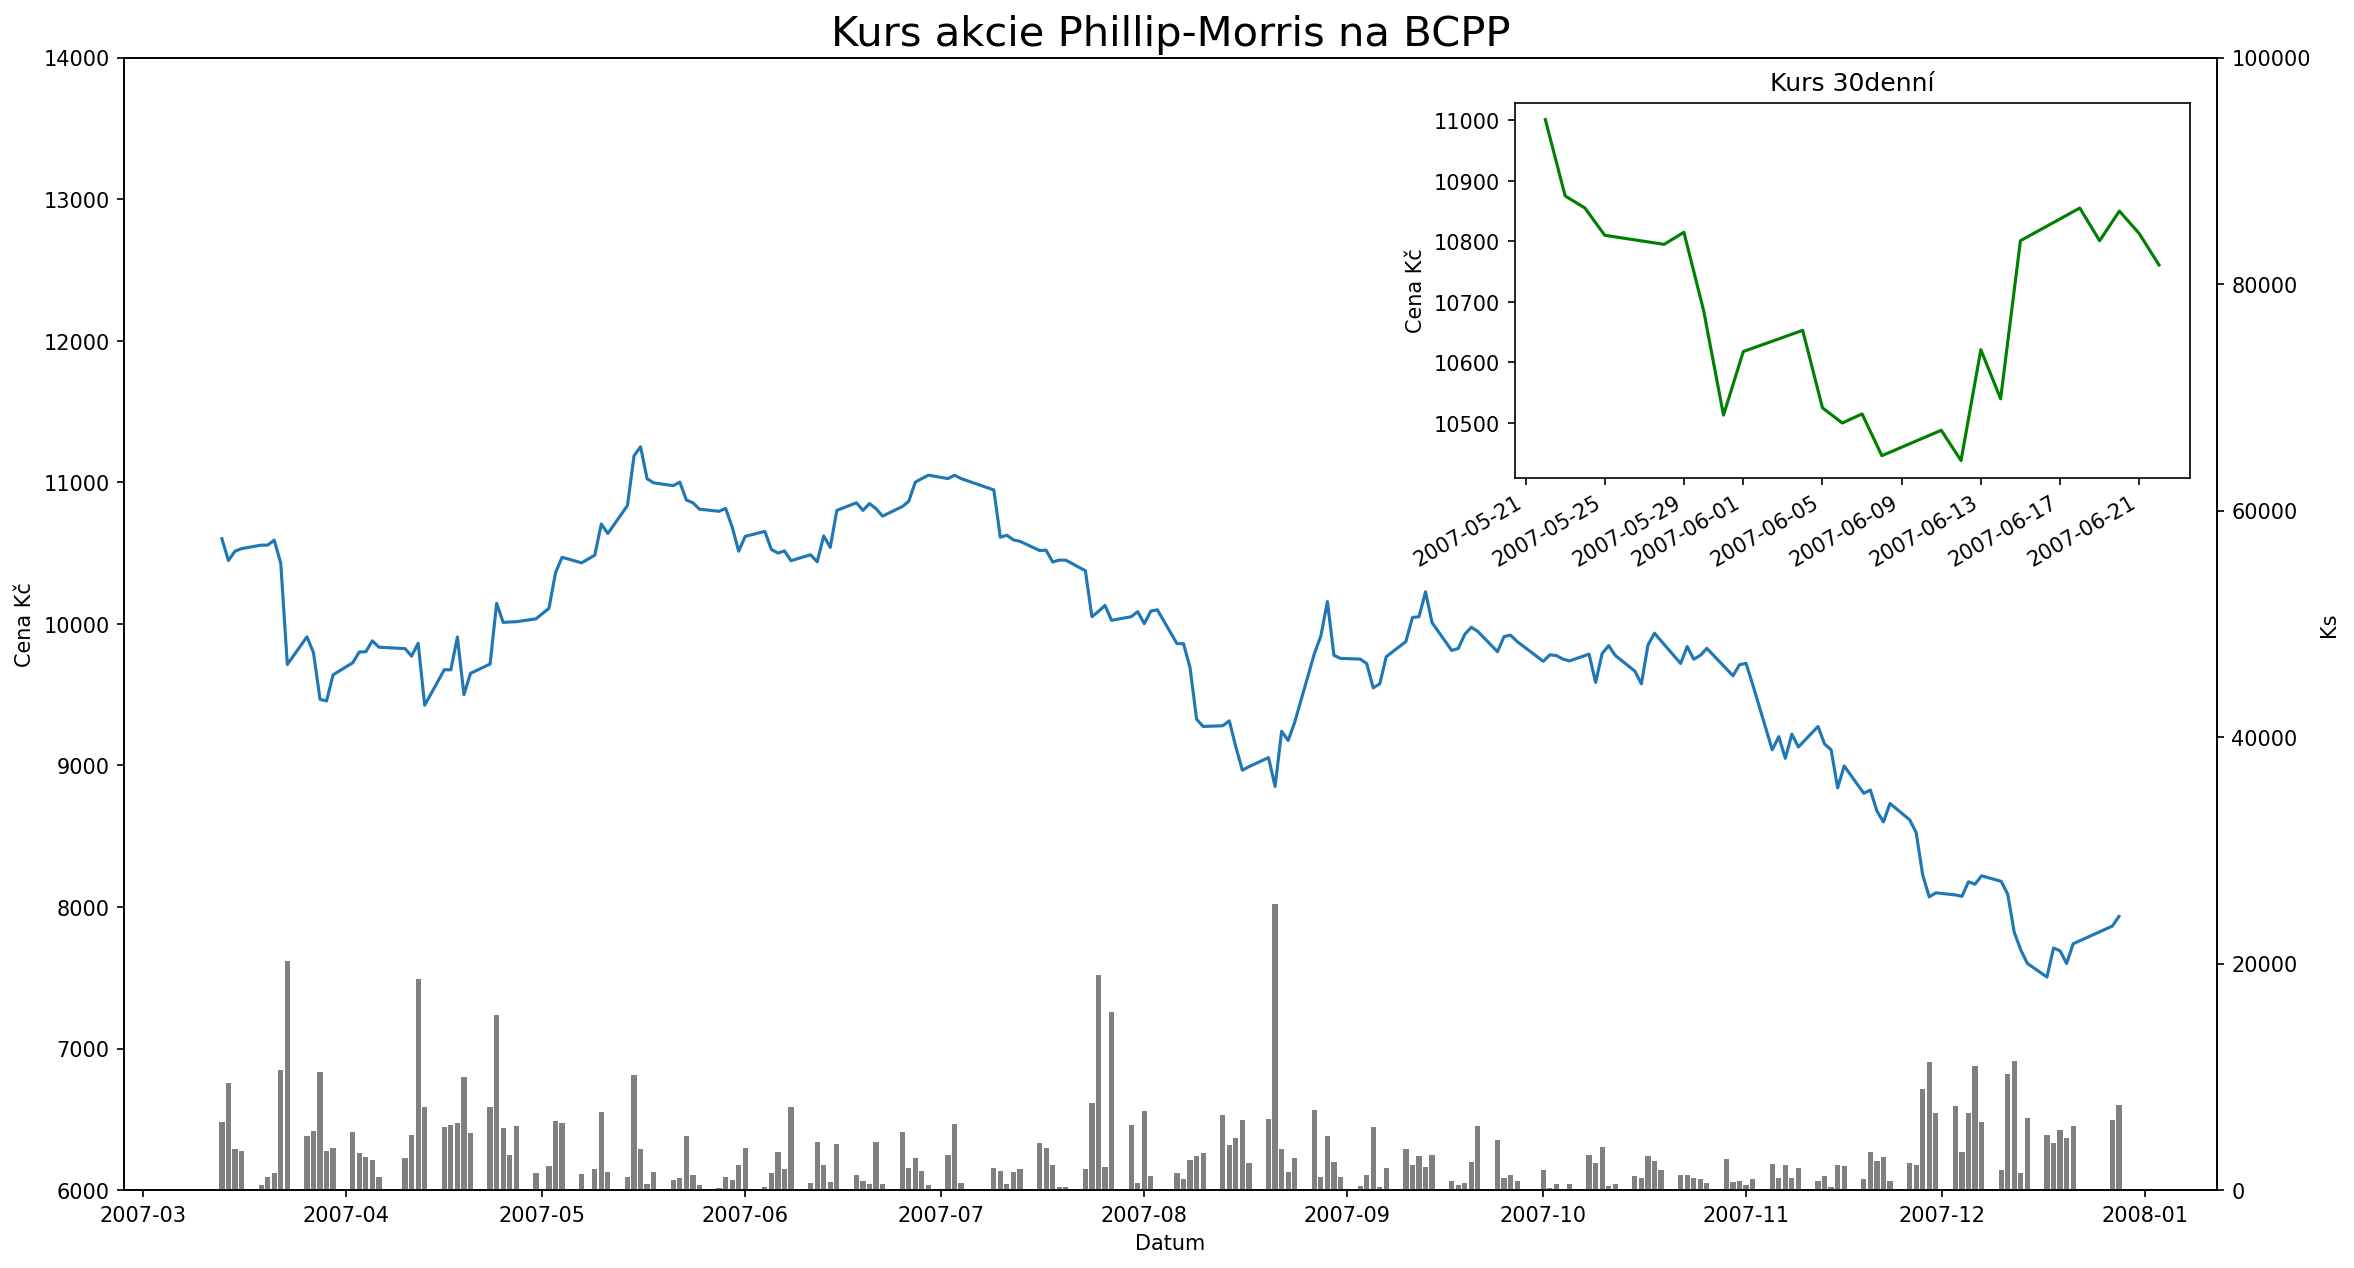

In [213]:
fig, ax = plt.subplots(figsize=(18,10),dpi=150)
ax.set_ylim(6000,14000)
ax.plot(df["Datum"],df["Kurz BCPP[Kč]"])
ax2 = ax.twinx()
ax2.set_ylim(0,100000)
ax2.bar(df["Datum"],df["Počet BCPP[ks]"], color="gray")
ax.set_xlabel("Datum")
ax.set_ylabel("Cena Kč")
ax2.set_ylabel("Ks")
plt.title("Kurs akcie Phillip-Morris na BCPP",fontsize=20)
ax3 = fig.add_axes([0.64,0.60,0.25, 0.25])
ax3.plot(df_small["Datum"], df_small["Kurz BCPP[Kč]"], color="green")
ax3.set_ylabel("Cena Kč")
ax3.set_title("Kurs 30denní")
plt.setp(ax3.get_xticklabels(), rotation=30, horizontalalignment='right')
#plt.tight_layout()
plt.show()
fig.savefig("P-M_Chart.png", bbox_inches="tight")


In [154]:
df_list=pd.read_html("https://www.kurzy.cz/akcie-cz/akcie/cez-183/graf_2007", thousands=" ")

In [187]:
df1.head()

1,Datum,KurzBCPP[Kč],ZměnaBCPP[%],ObjemBCPP[Kč],PočetBCPP[ks],KurzRMS[Kč],ZměnaRMS[%],ObjemRMS[Kč]
2,28.12.2007,1 362.00,-0.58%,1 175 755 625,862 500,1 361.20,-0.24%,13 001 030
3,27.12.2007,1 370.00,+4.58%,2 451 395 800,1 832 072,1 364.50,+0.56%,5 208 939
4,21.12.2007,1 310.00,-5.35%,3 440 954 532,2 549 522,1 356.80,-2.60%,16 457 900
5,20.12.2007,1 384.00,+1.32%,1 287 277 288,936 117,1 393.10,+2.18%,1 830 463
6,19.12.2007,1 366.00,-2.22%,2 473 541 942,1 803 898,1 363.30,-1.98%,8 398 944


In [196]:
df1.head()

1,Datum,KurzBCPP[Kč],ZměnaBCPP[%],ObjemBCPP[Kč],PočetBCPP[ks],KurzRMS[Kč],ZměnaRMS[%],ObjemRMS[Kč]
2,2007-12-28,1362.00,-0.58%,1 175 755 625,862500,1 361.20,-0.24%,13 001 030
3,2007-12-27,1370.00,+4.58%,2 451 395 800,1832072,1 364.50,+0.56%,5 208 939
4,2007-12-21,1310.00,-5.35%,3 440 954 532,2549522,1 356.80,-2.60%,16 457 900
5,2007-12-20,1384.00,+1.32%,1 287 277 288,936117,1 393.10,+2.18%,1 830 463
6,2007-12-19,1366.00,-2.22%,2 473 541 942,1803898,1 363.30,-1.98%,8 398 944


In [178]:
df1.to_csv("CEZ_share_price.csv")

In [192]:
df1["Datum"] = pd.to_datetime(df1["Datum"],format="%d.%m.%Y")

In [194]:
df1["KurzBCPP[Kč]"] = df1["KurzBCPP[Kč]"].str.replace("\s+","").apply(lambda x: Decimal(x))

In [195]:
df1["PočetBCPP[ks]"] = df1["PočetBCPP[ks]"].str.replace("\s+","").apply(lambda x: Decimal(x))

In [198]:
df1_small = df1[df1["Datum"].between("2007-05-22","2007-06-22")]

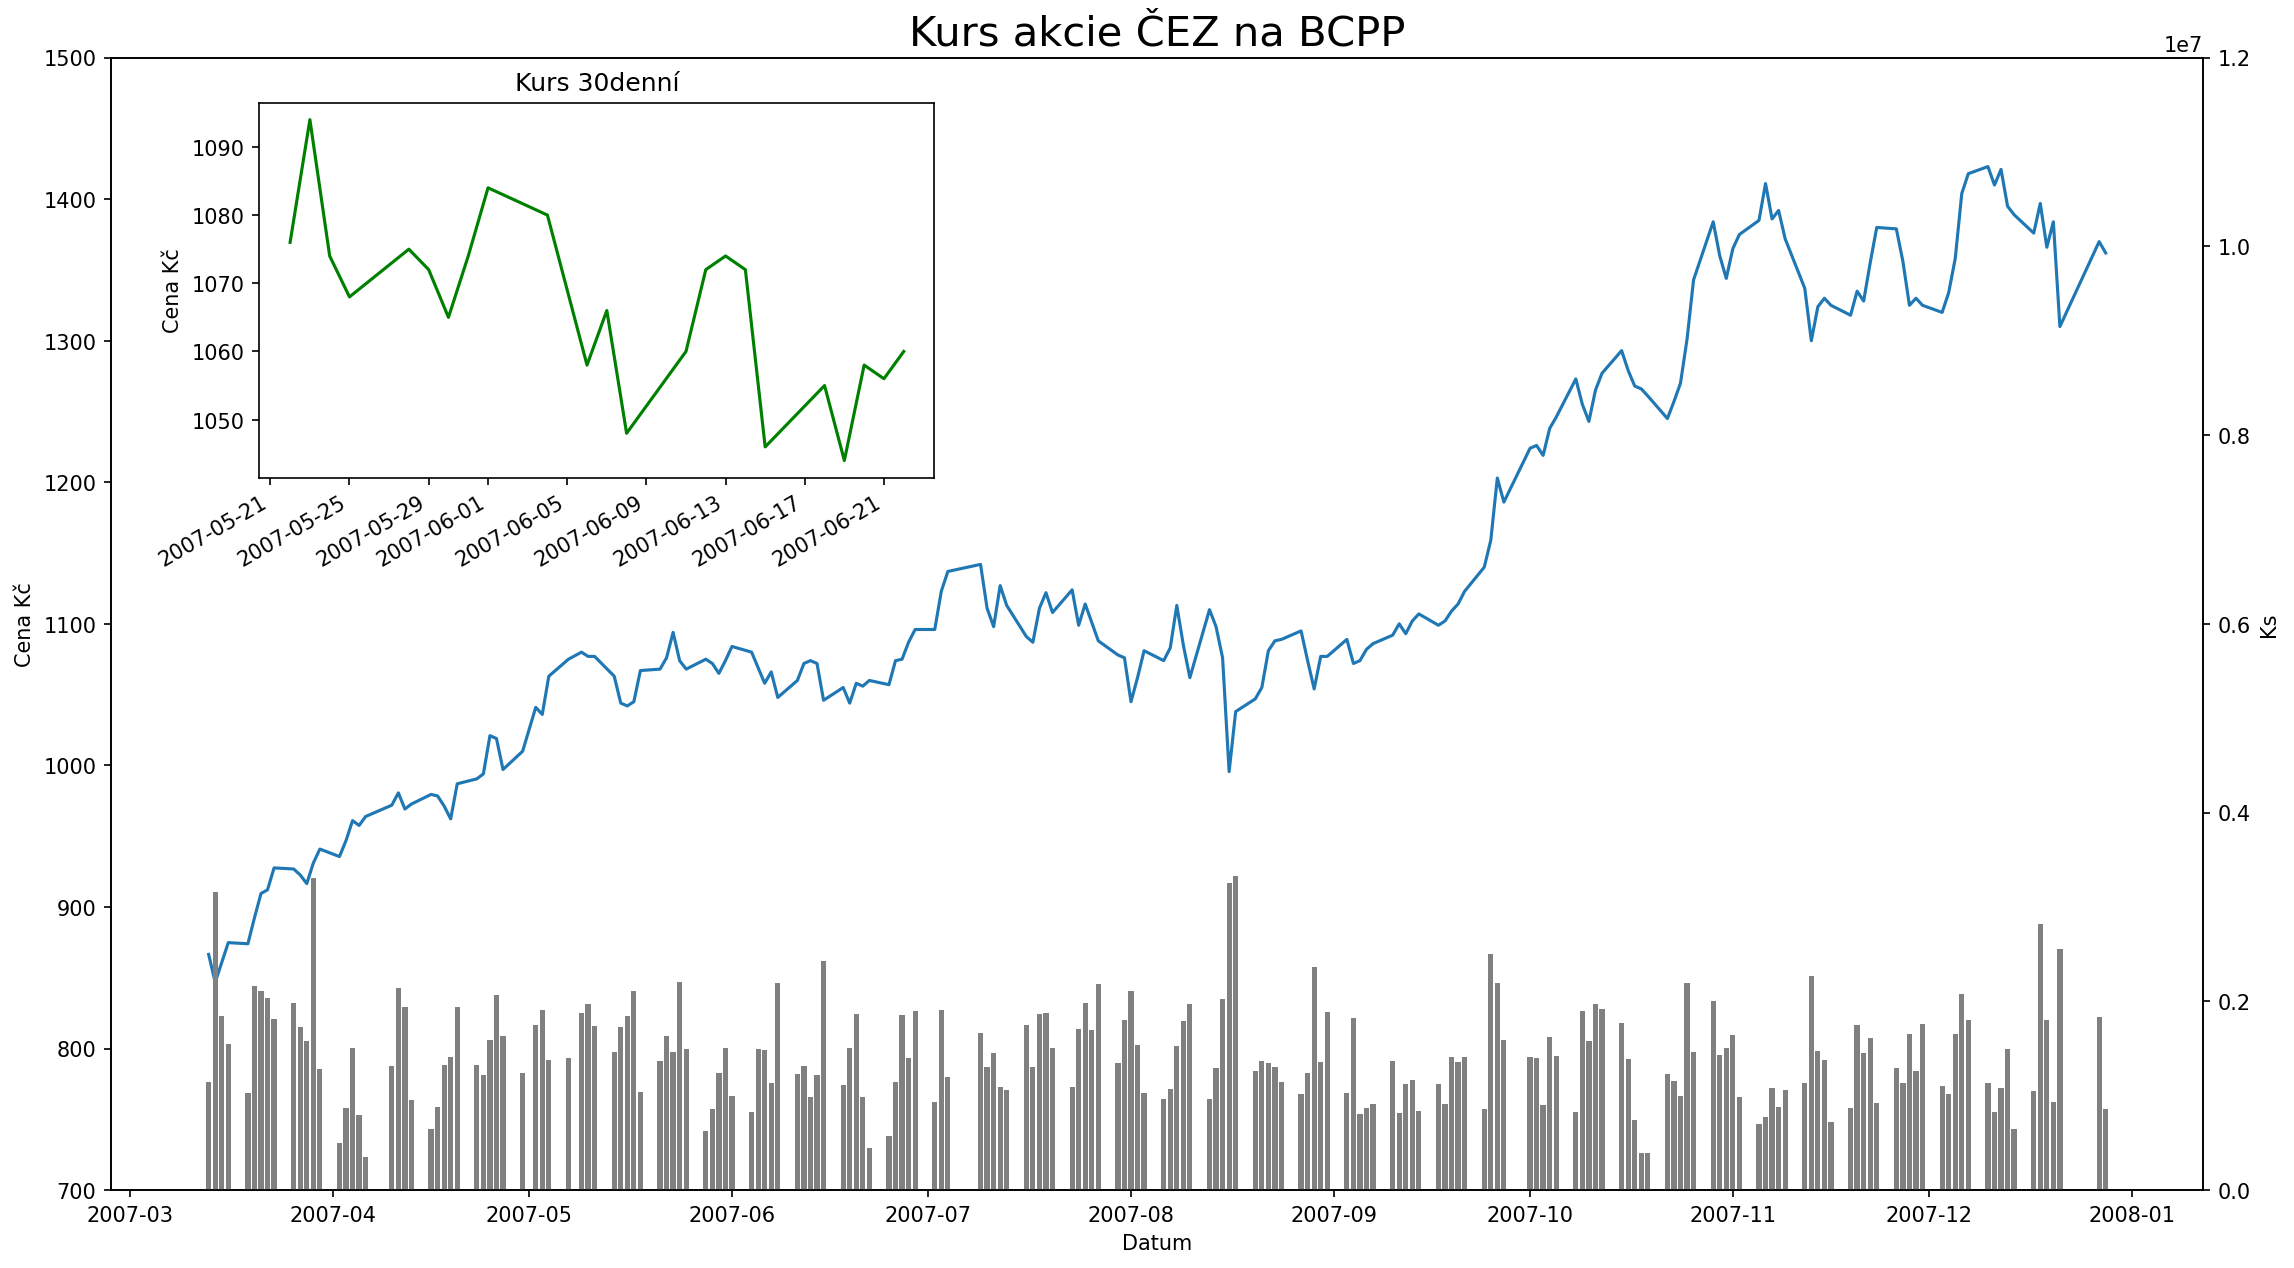

In [212]:
fig, ax = plt.subplots(figsize=(18,10),dpi=150)
ax.set_ylim(700,1500)
ax.plot(df1["Datum"],df1["KurzBCPP[Kč]"])
ax2 = ax.twinx()
ax2.set_ylim(0,12000000)
ax2.bar(df1["Datum"],df1["PočetBCPP[ks]"], color="gray")
ax.set_xlabel("Datum")
ax.set_ylabel("Cena Kč")
ax2.set_ylabel("Ks")
plt.title("Kurs akcie ČEZ na BCPP",fontsize=20)
ax3 = fig.add_axes([0.18,0.60,0.25, 0.25])
ax3.plot(df1_small["Datum"], df1_small["KurzBCPP[Kč]"], color="green")
ax3.set_ylabel("Cena Kč")
ax3.set_title("Kurs 30denní")
plt.setp(ax3.get_xticklabels(), rotation=30, horizontalalignment='right')
#plt.tight_layout()
plt.show()
fig.savefig("CEZ_Chart.png", bbox_inches="tight")
